# Conway's Game of Life

A [cellular automaton created by John Conway in 1970](https://www.wikiwand.com/en/Conway%27s_Game_of_Life). In each iteration, the game evolves according to a set of rules that determine whether grid cells are live or dead. The game requires the set up of the initial conditions by the player, and the different patterns in initial conditions trigger a myriad of possible scenarios.

## Rules

- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Generate the two-dimensional grid

The grid is the universe of the game.

In [2]:
grid_rows = 100
grid_cols = 100
grid = np.zeros([grid_rows,grid_cols])


## Generate initial conditions

This is one of the most important steps in the game of life. The evolution of the game in each iteration stems from the initial condition. As a player, you can change the initial conditions to explore different scenarios and patterns. For simplicity we will generate random live cells, but you can create any pattern you want.

In [3]:
# Set random seed for reproducibility
np.random.seed(3) # 2

# Number of live cells
N_seeds = 3000

# Randomly select rows and columns for the random seeds
row_seeds = np.random.randint(0, grid.shape[0], N_seeds)
col_seeds = np.random.randint(0, grid.shape[1], N_seeds)

# Convert randomly selected cells from 0 to 1 (bring them to life)
grid[row_seeds,col_seeds] = 1

## Display initial conditions

Before we keep going we should check our work.

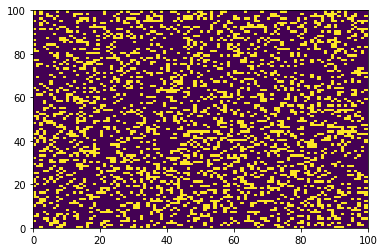

In [4]:
plt.pcolormesh(grid)
plt.show()

## Iterations and offsets

Set row and column combinations for each neighboring cell, excluding the center cell in a 8-connected neighbor array.

In [5]:
offset_rows = np.array([-1, -1, -1, 0, 0, 1, 1, 1])
offset_cols = np.array([-1, 0, 1, -1, 1, -1, 0, 1])

## Iterate over each cell and apply rules

In this step will iterate over each cell, compute the number of neighbors (without include the center cell), and then we will apply the rules to determine whether the cell will be live or dead in the next generation. As you can imagine, when visitng cells in the top-most row, bottom-most row, left-most column, or right-most column we will be missing some of the neighboring cells. So at this point, the goal is to make the game work ignoring the boundaries to simplify the problem. We will take care of the boundaries in following steps.

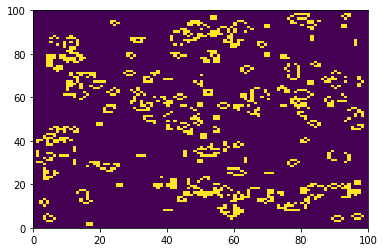

In [7]:
N = 100
for i in range(N):
    clear_output(wait=True)
    plt.pcolormesh(grid)
    plt.show()

    # Create new empty grid to store results for next generation
    new_grid = np.zeros([grid_rows,grid_cols])
    
    for row in range(1, grid.shape[0]-1):
        for col in range(1, grid.shape[1]-1):
            
            # Compute sum of neighbors
            cell_sum = grid[row + offset_rows, col + offset_cols].sum()
            
            # Decide whether current cell grid will live or die
            if grid[row,col] == 1:
                
                # Cell with fewer than two live neighbours dies (underpopulation)
                if  cell_sum < 2:
                    new_grid[row,col] = 0

                # Cell with two or three live neighbours lives on to the next generation
                elif cell_sum == 2 or cell_sum == 3:
                    new_grid[row,col] = 1

                # Cell with more than three live neighbours dies (overpopulation)
                elif cell_sum > 3:
                    new_grid[row,col] = 0
            else:
                
                # Cell with exactly three live neighbours becomes a live cell (reproduction)
                if cell_sum == 3:
                    new_grid[row,col] = 1
    
    # Replace current generation with next generation
    grid = new_grid

## Full code with torus boundaries

We will handle the boundaries using a [torus](https://www.wikiwand.com/en/Torus) approach. A torus simply means that if rows or columns have values that beyond the dimensions of the grid, then we will set the boundary on the opposite side of the grid as the continuation, so that we have 8 neighboring cells for each cell on the grid.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/60/Torus_from_rectangle.gif">

Below is a full example including the computation of the torus and the real-time visualization of the total number of live cells. Will the population perish or will it reach equilibrium and perpetuate indefinitely?

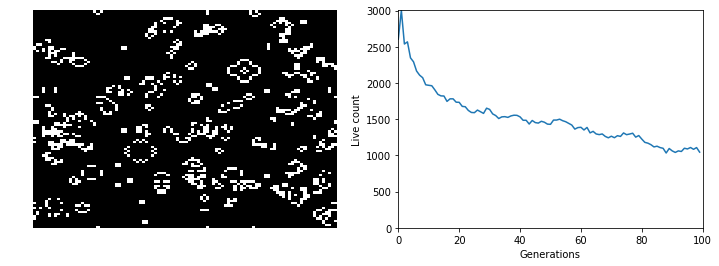

In [3]:
# Final version with Torus and subplots
grid_rows = 100
grid_cols = 100
grid = np.zeros([grid_rows,grid_cols])

np.random.seed(3) # 2
N_seeds = 3000
row_seeds = np.random.randint(0, grid.shape[0], N_seeds)
col_seeds = np.random.randint(0, grid.shape[1], N_seeds)


grid[row_seeds,col_seeds] = 1

N = 100
offset_rows = np.array([-1, -1, -1, 0, 0, 1, 1, 1])
offset_cols = np.array([-1, 0, 1, -1, 1, -1, 0, 1])

total_live = np.array([grid.sum()])

for i in range(N):
    clear_output(wait=True)
    
    fig = plt.figure(figsize=(12,4))
    fig.tight_layout()

    left_img = fig.add_subplot(1, 2, 1)
    left_img.axis('off')
    plt.pcolormesh(grid, cmap='gray')

    right_img = fig.add_subplot(1, 2, 2)
    right_img.set_ylabel('Live count')
    right_img.set_xlabel('Generations')
    right_img.set_xlim([0, N])
    right_img.set_ylim([0, total_live.max()])
    plt.plot(np.arange(i+1),total_live) # Re-plot the entire line

    plt.show()
    
    # Create new empty grid to store results for next generation
    new_grid = np.zeros([grid_rows,grid_cols])
    
    for row in range(0, grid.shape[0]):
        for col in range(0, grid.shape[1]):
            
            # Torus for rows
            rows = row + offset_rows
            rows[rows >= grid_rows] = 0 # if higher than last row, then use first row
            rows[rows < 0] = grid_rows -1 # if lower than first row, then use last row
            
            # Torus for columns
            cols = col + offset_cols
            cols[cols >= grid_cols] = 0 # if higher than last column, then use first column
            cols[cols < 0] = grid_cols - 1 # if lower than first column, then use last column
            
            # Compute sum of neighbors
            cell_sum = grid[rows, cols].sum()
            
            # Decide whether current cell grid will live or die
            if grid[row,col] == 1:
                
                # Cell with fewer than two live neighbours dies (underpopulation)
                if  cell_sum < 2:
                    new_grid[row,col] = 0

                # Cell with two or three live neighbours lives on to the next generation
                elif cell_sum == 2 or cell_sum == 3:
                    new_grid[row,col] = 1

                # Cell with more than three live neighbours dies (overpopulation)
                elif cell_sum > 3:
                    new_grid[row,col] = 0
            else:
                
                # Cell with exactly three live neighbours becomes a live cell (reproduction)
                if cell_sum == 3:
                    new_grid[row,col] = 1
    
    # Count and append number of live cells
    total_live = np.append(total_live, new_grid.sum())
    
    # Replace current generation with next generation
    grid = new_grid
